# Step 1: Import Required Libraries
First, import the necessary Python libraries for data handling, visualization, preprocessing, and machine learning.

In [3]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding & Scaling
from sklearn.ensemble import RandomForestClassifier  # Machine learning model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation


# Step 2: Load the Dataset
Read the telecom churn dataset from the CSV file.

In [6]:
# Load the dataset
file_path = "telecom_churn_data.csv"  # File location
df = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Preview:")
print(df.head())


Dataset Preview:
  columns1  columns2  columns3   columns4 columns5 columns6  columns7  \
0       KS       128       415   382-4657       no      yes        25   
1       OH       107       415   371-7191       no      yes        26   
2       NJ       137       415   358-1921       no       no         0   
3       OH        84       408   375-9999      yes       no         0   
4       OK        75       415   330-6626      yes       no         0   

   columns8  columns9  columns10  ...  columns12  columns13  columns14  \
0     265.1       110      45.07  ...         99      16.78      244.7   
1     161.6       123      27.47  ...        103      16.62      254.4   
2     243.4       114      41.38  ...        110      10.30      162.6   
3     299.4        71      50.90  ...         88       5.26      196.9   
4     166.7       113      28.34  ...        122      12.61      186.9   

   columns15  columns16  columns17  columns18  columns19  columns20  columns21  
0         91      

# Step 3: Check for Missing Values
Identify if there are any missing values in the dataset.

In [9]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())  # Check for missing values



Missing Values in Each Column:
columns1     0
columns2     0
columns3     0
columns4     0
columns5     0
columns6     0
columns7     0
columns8     0
columns9     0
columns10    0
columns11    0
columns12    0
columns13    0
columns14    0
columns15    0
columns16    0
columns17    0
columns18    0
columns19    0
columns20    0
columns21    0
dtype: int64


If there are missing values, they need to be handled (e.g., filling with mean/median values or removing rows).

# Step 2: Assign Correct Column Names
Since the business case document provides the actual column names, we manually rename them.

In [30]:
# Define the correct column names from the business case
column_names = [
    "State", "Account Length", "Area Code", "Phone", "International Plan",
    "VMail Plan", "VMail Message", "Day Mins", "Day Calls", "Day Charge",
    "Eve Mins", "Eve Calls", "Eve Charge", "Night Mins", "Night Calls",
    "Night Charge", "International Mins", "International Calls",
    "International Charge", "CustServ Calls", "Churn"
]

# Reload the dataset and assign column names manually
df = pd.read_csv("telecom_churn_data.csv", names=column_names, skiprows=1)

# Display the updated dataset
print("\n✅ Dataset with Correct Column Names:")
print(df.head())



✅ Dataset with Correct Column Names:
  State  Account Length  Area Code      Phone International Plan VMail Plan  \
0    KS             128        415   382-4657                 no        yes   
1    OH             107        415   371-7191                 no        yes   
2    NJ             137        415   358-1921                 no         no   
3    OH              84        408   375-9999                yes         no   
4    OK              75        415   330-6626                yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   



# Step 3: Verify Column Names
Now, check if the column names are correctly set.

In [36]:
# Display column names
print("\n✅ Column Names in Dataset:")
print(df.columns)



✅ Column Names in Dataset:
Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')


# Step 4: Handle Categorical Features
Since "International Plan", "VMail Plan", and "Churn" are categorical, we convert them into numerical values.

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert categorical features into numeric values
df['International Plan'] = le.fit_transform(df['International Plan'])
df['VMail Plan'] = le.fit_transform(df['VMail Plan'])
df['Churn'] = le.fit_transform(df['Churn'])  # Yes -> 1, No -> 0

print("\n✅ Categorical Features Transformed:")
print(df.head())



✅ Categorical Features Transformed:
  State  Account Length  Area Code      Phone  International Plan  VMail Plan  \
0    KS             128        415   382-4657                   0           1   
1    OH             107        415   371-7191                   0           1   
2    NJ             137        415   358-1921                   0           0   
3    OH              84        408   375-9999                   1           0   
4    OK              75        415   330-6626                   1           0   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122      

# Step 5: Save the Processed Dataset
Now, save the processed dataset for further analysis.

In [44]:
df.to_csv("processed_telecom_churn_data.csv", index=False)
print("\n✅ Processed dataset saved as 'processed_telecom_churn_data.csv'")



✅ Processed dataset saved as 'processed_telecom_churn_data.csv'


# Step 4: Encode Categorical Variables
Convert categorical variables (International Plan, VMail Plan, Churn) into numerical format.

python
Copy
Edit


In [47]:
le = LabelEncoder()  # Initialize label encoder

# Encode categorical features
df['International Plan'] = le.fit_transform(df['International Plan'])  # Yes -> 1, No -> 0
df['VMail Plan'] = le.fit_transform(df['VMail Plan'])
df['Churn'] = le.fit_transform(df['Churn'])  # Yes -> 1, No -> 0


# Step 5: Drop Unnecessary Columns

In [50]:
df.drop(columns=['State', 'Phone'], inplace=True)  # Drop irrelevant columns


# Step 6: Define Features and Target Variable
X (features) = All columns except Churn
y (target) = Churn column (1 = Churn, 0 = No Churn)

In [54]:
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable


# Step 7: Split the Data into Training and Testing Sets

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Step 8: Normalize the Features
Machine learning models work better when features are scaled properly. Use StandardScaler for normalization.

In [60]:
scaler = StandardScaler()  # Initialize StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data


# Step 9: Train the Machine Learning Model
Use Random Forest Classifier to train the model.

In [63]:
# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on scaled training data
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

# Step 10: Make Predictions
Use the trained model to predict churn on the test dataset.

python
Copy
Edit


In [66]:
y_pred = model.predict(X_test_scaled)  # Predict churn


# Step 11: Evaluate Model Performance
Check how well the model performed using accuracy, classification report, and confusion matrix.

In [73]:
# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Model Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       793
           1       0.90      0.71      0.79       131

    accuracy                           0.95       924
   macro avg       0.93      0.85      0.88       924
weighted avg       0.95      0.95      0.95       924




Confusion Matrix:


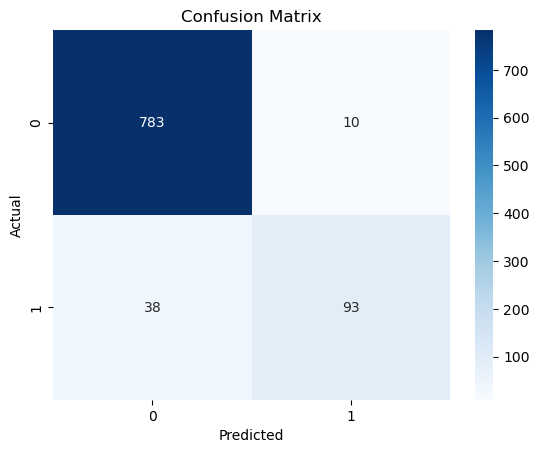

In [71]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Visualize confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Step 6: Define Features (X) and Target (y)
Features (X): All columns except "Churn"
Target (y): "Churn" column (1 = Churn, 0 = No Churn)

In [77]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Churn'])  # Features (all columns except "Churn")
y = df['Churn']  # Target variable (1 = Churn, 0 = No Churn)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n✅ Data split into training and testing sets successfully.")



✅ Data split into training and testing sets successfully.


# Import Required Libraries
We will use Grid Search CV to test multiple combinations of hyperparameters.

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required at a leaf node
    'bootstrap': [True, False]  # Use bootstrapping?
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Train using Grid Search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("\n✅ Best Parameters Found:", best_params)


Fitting 3 folds for each of 216 candidates, totalling 648 fits

✅ Best Parameters Found: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Train the Model with Best Parameters
Now, let's train the Random Forest model using the best hyperparameters found.

In [84]:
# Train Random Forest with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_best = best_rf.predict(X_test_scaled)



In [88]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
# Accuracy Score
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"\n🎯 Improved Model Accuracy: {best_accuracy:.2f}")



🎯 Improved Model Accuracy: 0.94


In [92]:
 Classification Report
print("\n📊 Improved Classification Report:")
print(classification_report(y_test, y_pred_best))


SyntaxError: invalid syntax (4148568857.py, line 1)

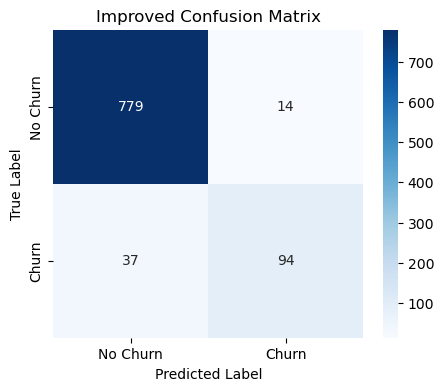

In [94]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Improved Confusion Matrix")
plt.show()

# ture Importance Analysis
This will show which features are most important for predicting churn.

In [97]:
# Extract feature importance
importances = best_rf.feature_importances_




In [99]:
# Convert to DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [101]:
# Print top features
print("\n🔥 Top Features Impacting Churn:")
print(feature_importance_df.head(10))


🔥 Top Features Impacting Churn:
                 Feature  Importance
7             Day Charge    0.137923
5               Day Mins    0.137123
17        CustServ Calls    0.123598
2     International Plan    0.091948
8               Eve Mins    0.066105
10            Eve Charge    0.065983
15   International Calls    0.058391
13          Night Charge    0.039915
14    International Mins    0.039617
16  International Charge    0.039451


C:\Users\Naveen\AppData\Local\Temp\ipykernel_4988\1631551422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")


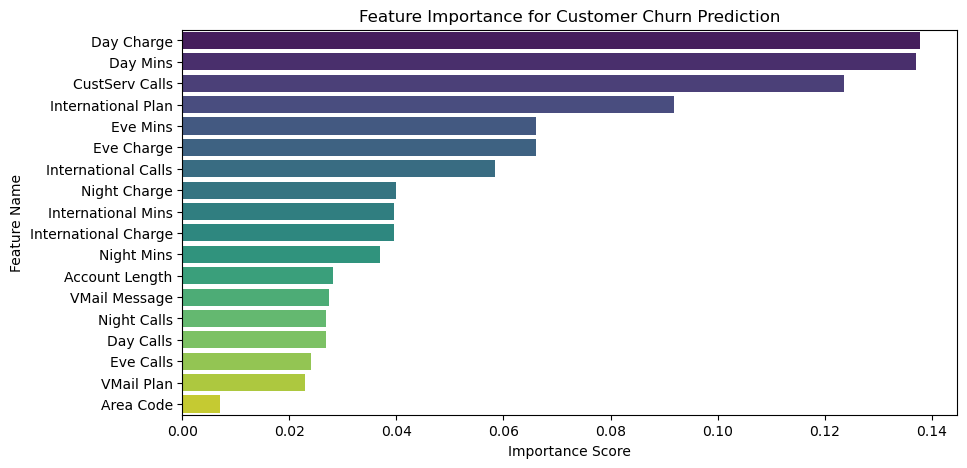

In [103]:
# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.title("Feature Importance for Customer Churn Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


# Train Logistic Regression Model
Logistic Regression is a simple, interpretable model for binary classification like churn prediction.

In [106]:
from sklearn.linear_model import LogisticRegression




In [108]:
# Initialize and train the Logistic Regression model
log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [110]:

# Make predictions
y_pred_log = log_model.predict(X_test_scaled)

In [112]:
# Evaluate performance
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"\n📊 Logistic Regression Accuracy: {log_accuracy:.2f}")
print("\n📄 Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))



📊 Logistic Regression Accuracy: 0.86

📄 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       793
           1       0.52      0.18      0.27       131

    accuracy                           0.86       924
   macro avg       0.70      0.58      0.60       924
weighted avg       0.83      0.86      0.83       924




# Train XGBoost Model
XGBoost is a powerful boosting algorithm that often outperforms other models.

python
Copy
Edit


In [117]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 217.9 kB/s eta 0:09:34
   ---------------------------------------- 0.0/124.9 MB 217.9 kB/s eta 0:09:34
   ---------------------------------------- 0.1/124.9 MB 607.9 kB/s eta 0:03:26
   ---------------------------------------- 0.9/124.9 MB 3.5 MB/s eta 0:00:36
    --------------------------------------- 2.0/124.9 MB 6.4 MB/s eta 0:00:20
    --------------------------------------- 2.4/124.9 MB 6.9 MB/s eta 0:00:18
    --------------------------------------- 2.8/124.9 MB 7.0 MB/s eta 0:00:18
   - ----------

In [119]:
import xgboost
print("✅ XGBoost installed successfully!")


✅ XGBoost installed successfully!


In [121]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"\n🚀 XGBoost Accuracy: {xgb_accuracy:.2f}")
print("\n📄 Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))



🚀 XGBoost Accuracy: 0.95

📄 Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       793
           1       0.89      0.76      0.82       131

    accuracy                           0.95       924
   macro avg       0.93      0.87      0.90       924
weighted avg       0.95      0.95      0.95       924



In [123]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [125]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [127]:
# Evaluate performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"\n🚀 XGBoost Accuracy: {xgb_accuracy:.2f}")
print("\n📄 Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))



🚀 XGBoost Accuracy: 0.95

📄 Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       793
           1       0.89      0.76      0.82       131

    accuracy                           0.95       924
   macro avg       0.93      0.87      0.90       924
weighted avg       0.95      0.95      0.95       924



# Compare Model Performance
Now, we compare Random Forest, Logistic Regression, and XGBoost.

In [130]:
# Store model results in a dictionary
model_results = {
    "Random Forest": best_accuracy,
    "Logistic Regression": log_accuracy,
    "XGBoost": xgb_accuracy
}



In [132]:
# Print results
print("\n📊 Model Performance Comparison:")
for model, acc in model_results.items():
    print(f"{model}: {acc:.2f}")


📊 Model Performance Comparison:
Random Forest: 0.94
Logistic Regression: 0.86
XGBoost: 0.95


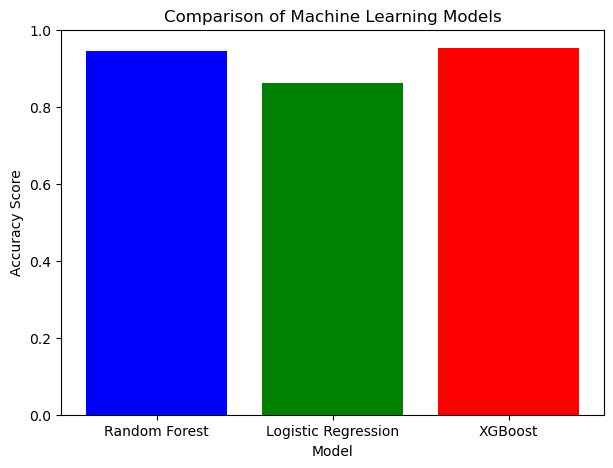

In [134]:

# Plot model performance
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.bar(model_results.keys(), model_results.values(), color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Machine Learning Models")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


# Define the Parameter Grid
We will tune key hyperparameters like:
✅ n_estimators → Number of boosting rounds
✅ max_depth → Maximum depth of a tree
✅ learning_rate → How much the model learns per step
✅ subsample → Percentage of data used per tree
✅ colsample_bytree → Features used per tree

In [137]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [139]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'subsample': [0.8, 1.0],  # % of data used per tree
    'colsample_bytree': [0.8, 1.0]  # % of features per tree
}

In [141]:
# Initialize XGBoost model
xgb = XGBClassifier(random_state=42)

In [143]:
# Perform Grid Search CV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, 
                               n_jobs=-1, verbose=2, scoring='accuracy')


In [145]:
# Train the model with hyperparameter tuning
grid_search_xgb.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [ ]:
# Get best parameters
best_xgb_params = grid_search_xgb.best_params_
print("\n✅ Best Parameters Found:", best_xgb_params)


 # Deployment Options

Save the Tuned Model
Before deployment, save the trained model using joblib.

In [151]:
from xgboost import XGBClassifier

# Train XGBoost model again with best parameters
best_xgb = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)
best_xgb.fit(X_train_scaled, y_train)

print("✅ XGBoost Model Re-trained Successfully!")


✅ XGBoost Model Re-trained Successfully!


In [155]:
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb, "xgboost_churn_model.pkl")

print("\n✅ Model saved as 'xgboost_churn_model.pkl'")



✅ Model saved as 'xgboost_churn_model.pkl'


In [167]:
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb, "xgboost_churn_model.pkl")

print("\n✅ Model saved as 'xgboost_churn_model.pkl'")



✅ Model saved as 'xgboost_churn_model.pkl'


# Verify the Model is Saved Correctly
You can check if the model was saved properly by loading it back and making a test prediction.

In [172]:
# Load the saved model
loaded_model = joblib.load("xgboost_churn_model.pkl")

# Make a test prediction (using the first row of X_test_scaled)
test_prediction = loaded_model.predict([X_test_scaled[0]])

print("\n✅ Model Loaded Successfully! Test Prediction:", test_prediction)



✅ Model Loaded Successfully! Test Prediction: [0]


In [174]:
pip install flask


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [180]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np

# Load the trained XGBoost model
model = joblib.load("xgboost_churn_model.pkl")

# Load the scaler (if you used feature scaling)
scaler = joblib.load("scaler.pkl")

# Initialize the Flask app
app = Flask(__name__)

@app.route("/")
def home():
    return "Welcome to the Telecom Churn Prediction API!"

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get JSON data from request
        data = request.get_json()

        # Convert input into a DataFrame
        df = pd.DataFrame(data, index=[0])

        # Scale input features if necessary
        df_scaled = scaler.transform(df)

        # Make prediction
        prediction = model.predict(df_scaled)[0]

        # Convert prediction to human-readable format
        result = "Churn" if prediction == 1 else "No Churn"

        return jsonify({"churn_prediction": result})
    
    except Exception as e:
        return jsonify({"error": str(e)})

# Run the Flask app
if __name__ == "__main__":
    app.run(debug=True, host="0.0.0.0", port=5000)


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'

In [184]:
import joblib
from sklearn.preprocessing import StandardScaler

# Save the scaler after fitting
joblib.dump(scaler, "scaler.pkl")

print("\n✅ Scaler saved as 'scaler.pkl'")



✅ Scaler saved as 'scaler.pkl'


In [188]:
import joblib

# Load the model and scaler
model = joblib.load("xgboost_churn_model.pkl")
scaler = joblib.load("scaler.pkl")  # Now it should work!

print("\n✅ Model and Scaler Loaded Successfully!")



✅ Model and Scaler Loaded Successfully!


In [190]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np

# Load the trained XGBoost model
model = joblib.load("xgboost_churn_model.pkl")

# Load the scaler (if you used feature scaling)
scaler = joblib.load("scaler.pkl")

# Initialize the Flask app
app = Flask(__name__)

@app.route("/")
def home():
    return "Welcome to the Telecom Churn Prediction API!"

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get JSON data from request
        data = request.get_json()

        # Convert input into a DataFrame
        df = pd.DataFrame(data, index=[0])

        # Scale input features if necessary
        df_scaled = scaler.transform(df)

        # Make prediction
        prediction = model.predict(df_scaled)[0]

        # Convert prediction to human-readable format
        result = "Churn" if prediction == 1 else "No Churn"

        return jsonify({"churn_prediction": result})
    
    except Exception as e:
        return jsonify({"error": str(e)})

# Run the Flask app
if __name__ == "__main__":
    app.run(debug=True, host="0.0.0.0", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.107:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [192]:
python app.py


SyntaxError: invalid syntax (2255720966.py, line 1)

In [194]:
import requests

# Sample customer data (replace with real values)
customer_data = {
    "Account Length": 100,
    "Area Code": 415,
    "International Plan": 0,
    "VMail Plan": 1,
    "VMail Message": 25,
    "Day Mins": 200.5,
    "Day Calls": 100,
    "Day Charge": 45.07,
    "Eve Mins": 300.1,
    "Eve Calls": 120,
    "Eve Charge": 30.07,
    "Night Mins": 250.5,
    "Night Calls": 120,
    "Night Charge": 15.07,
    "International Mins": 10.2,
    "International Calls": 5,
    "International Charge": 2.75,
    "CustServ Calls": 2
}

# Send request to API
response = requests.post("http://127.0.0.1:5000/predict", json=customer_data)

# Show response
print(response.json())


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DC52994C50>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))